# Discente:
Nome: Daniel Victor Lemos de Morais\
Matrícula: 201911250034

## Capítulo 10 - O projeto de sistemas de controle com retroação

Neste capítulo são desenvolvidas diversas ténicas de projeto no domínio de frequência que permitem alcançar o desempenho desejado do sistema. Os potentes controladores de avanço e atraso de fase são apresentados e utilizados em diversos exemplos de projeto.

## Introdução

Um sistema de controle com retroação que propicie um desempenho ótimo sem necessidade de quaisquer ajustes é, na realidade, um caso raro. Comumente, quando não é possívell obter todas as especificicações desejadas, torna-se necessário estabelecer um compromisso entre as diversas especificações requeridas e conflitantes e proceder ao ajuste dos parâmetros dos sistema de modo a alcançar um desempenho aceitável.

O projeto de um sistema de controle trata da concepção e da realização da estrutura do sistema de seleção de componentes e de parâmetros adequados. A alteração ou ajuste de um sistema de controle com a finalidade de obter um desempenho adequado é chamada de compensação. Isto é, a compensação é o ajuste de um sistema com a finalidade de corrigir deficiências ou inadequações. O dispositov de compensação pode ser elétrico, mecânico, hidráulico, pneumático ou algum outro tipo de dispositivo ou estrutura e é frequentemente chamado de compensador. Os circuitos elétricos servem comumente como compensadores em muitos sistemas de controle.

## Abordagens ao projeto de sistemas

O desempenho de um sistema de controle pode ser descrito em termos de medidas de desempenho no domínio do tempo ou de medidas de desempenho no domínio de frequência. O desempenho de um sistema pode ser especificado requerendo-se um certo tempo de pico, um valor máximo de ultrapassagem e um tempo de assentamento para uma entrada em degrau. Além disso, é necessário, usualmente especificar o valor máximo admissível do erro estacionário para diversas entradas de sinais de teste e entradas de pertubações.

Alternativamente, pode-se descrever o desempenho de um sistema de controle com retroação em termos de medidas de desempenho no domínio de frequência. Assim, um sistema pode ser descrito em termos do valor de pico da resposta de frequência a malha fechada, da frequência de ressonância, da banda passante e da margem de fase do sistema.

## Simulações

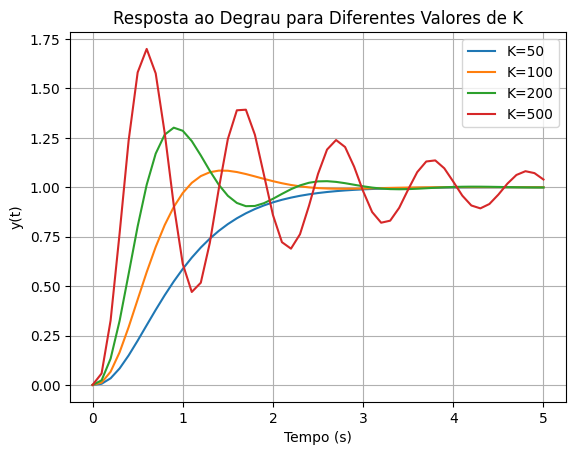

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Definindo os parâmetros
K = [50, 100, 200, 500]
numg = [1]
deng = [1, 15, 50, 0]
t = np.arange(0, 5.1, 0.1)  # Tempo de 0 a 5 com passo de 0.1

# Inicializando a matriz para armazenar as respostas
Ys = np.zeros((len(t), len(K)))

# Loop para calcular a resposta ao degrau para cada valor de K
for i in range(len(K)):
    # Criando a função de transferência com o ganho atual
    num_ka = [K[i] * coeff for coeff in numg]  # Multiplica cada coeficiente por K[i]
    den = deng

    # Criando a função de transferência do sistema
    sys_open_loop = ctl.tf(num_ka, den)

    # Criando o sistema em série com um sistema de ganho unitário
    sys_series = ctl.series(sys_open_loop, ctl.tf([1], [1]))

    # Criando o sistema de feedback
    sys_feedback = ctl.feedback(sys_series)

    # Calculando a resposta ao degrau
    t, y = ctl.step_response(sys_feedback, t)
    Ys[:, i] = y

# Plotando as respostas ao degrau
plt.plot(t, Ys[:, 0], '-', label='K=50')
plt.plot(t, Ys[:, 1], '-', label='K=100')
plt.plot(t, Ys[:, 2], '-', label='K=200')
plt.plot(t, Ys[:, 3], '-', label='K=500')
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.title('Resposta ao Degrau para Diferentes Valores de K')
plt.show()


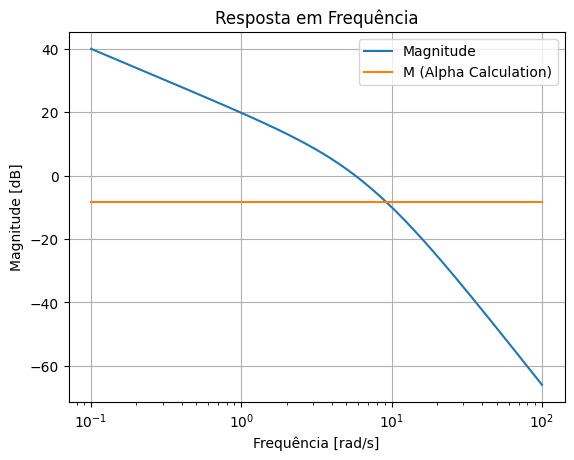

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Parâmetros
K = 500
numg = [1]
deng = [1, 15, 50, 0]

# Criando a função de transferência
num = [K * coeff for coeff in numg]  # Multiplica os coeficientes de numg por K
den = deng

# Criando o sistema
sys = ctl.tf(num, den)

# Frequências para o bode plot
w = np.logspace(-1, 2, 200)

# Resposta em frequência
mag, phase, _ = ctl.bode(sys, w, plot=False)

# Cálculo das margens de ganho e fase
Gm, Pm, Wcg, Wcp = ctl.margin(sys)

# Calculando Phi e alpha
Phi = (60 - Pm) * np.pi / 180
alpha = (1 + np.sin(Phi)) / (1 - np.sin(Phi))

# Calculando M
M = -10 * np.log10(alpha) * np.ones_like(w)

# Plotando o gráfico
plt.figure()
plt.semilogx(w, 20 * np.log10(mag), label='Magnitude')
plt.semilogx(w, M, label='M (Alpha Calculation)')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.title('Resposta em Frequência')
plt.show()

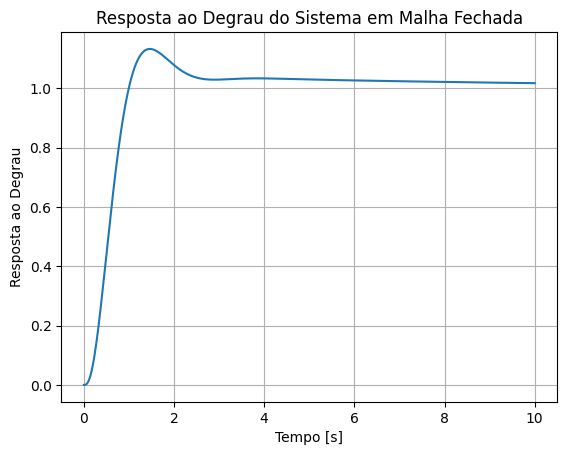

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Parâmetros
K = 100
numg = [1]
deng = [1, 15, 50, 0]

# Função de transferência do controlador
numgc = [K, K * 0.1]  # Numerador do controlador
dengc = [1, 0.01]     # Denominador do controlador

# Sistema em série
sys_open_loop = ctl.series(ctl.TransferFunction(numgc, dengc), ctl.TransferFunction(numg, deng))

# Sistema em malha fechada
sys_closed_loop = ctl.feedback(sys_open_loop)

# Tempo para resposta
t = np.linspace(0, 10, 1000)  # Define um vetor de tempo para a resposta

# Resposta ao degrau
t, y = ctl.step_response(sys_closed_loop, t)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.xlabel('Tempo [s]')
plt.ylabel('Resposta ao Degrau')
plt.title('Resposta ao Degrau do Sistema em Malha Fechada')
plt.grid(True)
plt.show()